## DNA and Protein Alignment!
##### Feel free to run the entire program yourself to try it out. The only input needed is the length of the initial sequence--I've been testing it with lengths of a few hundred, but any number should work.

In [5]:
!pip install biopython

### Generate a random DNA sequence from input length:

In [8]:
from Bio import SeqIO
from Bio.Seq import Seq
import random

desired_length = int(input("length of DNA sequence: "))
nucleotides = 'ACTG'
randomDNA_list = []

for k in range(desired_length):
    randomDNA_list.append(random.choice(nucleotides))

randomDNA_str = ''.join(randomDNA_list)

myseq = Seq(randomDNA_str)
print(f"DNA sequence: {myseq}")

length of DNA sequence: 500
DNA sequence: GATGAACAAAGGGTACTCCCGCCAACACTTGCCTCATAGATAACTAGGGAGGTTGCCACCGGGCTCTGTCAAACCCGATTGCGCTCGAGCCCTCCCTCCAGTGGTCGCGTTCAATTTCAAGTGTGTATTAGATGTGCGCTTGTCTGGTCCTGCAAGCTGGTCCTATCGGCCTTACATTTAACTATTTAGTGTGCACGTATCCCAGCCAGGGTCGCGCAGTGCGAACACTTGGCCCCGAATCCTGCGTGAAACAAATTCTAGCCGGGCTACGTATACTCAAGTAGGCTAGTGTAACAAGCTCTGGAGGAAGACAAAAGTTTACTCGCTTTAAAACAAACAACGTCTGTATGGCGGCTATCACTGCAGGAATAGCGGCCATAGAGATCGGAGTTGTGGATTATACTTAACTTAGCTTCCGCTCTGCTACTGCCTATACTCCTGTTATCAGTTAGACCAGATTCGCCCAAAGTTCCATGAGTGTTGCATGACAGTTAGATGAT


### Run DNA sequence through BLAST and save the search results to a file:
(this takes several minutes to run)

In [9]:
from Bio import Blast
from Bio.Blast import NCBIWWW
result_handle = NCBIWWW.qblast("blastn", "nt", f"{myseq}", hitlist_size=5)

with open("blast_result.xml", "w+") as save_to:
    save_to.write(result_handle.read())
    result_handle.close()

NCBI's BLAST (basic local alignment search tool) allows you to use a nucleotide or potein sequence to search NCBI's databases for similar sequences and align these sequences.

### Read BLAST result file and display the top 5 results (most similar sequences) aligned with the original DNA sequence:

In [50]:
from Bio import Blast
from Bio.Blast import NCBIXML
result_handle = open("blast_result.xml", "r")
blast_record = NCBIXML.read(result_handle)

count=1
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if count == 1:
            subject1 = hsp.sbjct
            query1 = hsp.query
        print(f"Alignment #{count}")
        print("Sequence:", alignment.title)
        print("Length:", alignment.length)
        print("E value:", hsp.expect)
        print(hsp.query)
        print(hsp.match)
        print(hsp.sbjct)
        print()
        count += 1

Alignment #1
Sequence: gi|1229155446|ref|XM_022234729.1| PREDICTED: Acanthaster planci uncharacterized LOC110979164 (LOC110979164), transcript variant X1, mRNA
Length: 2934
E value: 2.385
TATACTCAAGTA-GGCTAGTGTAACAAGCTCTGGAGGAAGACA
||| ||| |||| |||| |||| ||||||||||| ||||||||
TATCCTCCAGTATGGCTGGTGTTACAAGCTCTGGTGGAAGACA

Alignment #2
Sequence: gi|2303474184|emb|OX243835.2| Herminia tarsipennalis genome assembly, chromosome: 5
Length: 30125787
E value: 2.385
TATACTTAACTTAGCTTCCGCTCTGCTACTGCCTATACTCCTGTTATCAGT
|||||||||||||||| | | ||| | |||| || ||  ||||||||| ||
TATACTTAACTTAGCTCCTGGTCTACAACTGACTTTATCCCTGTTATCTGT

Alignment #3
Sequence: gi|2710185569|gb|CP137598.1| Eragrostis tef cultivar Dabbi chromosome 9A
Length: 24589398
E value: 8.32447
TCAATTTCAAGTGTGTATTAGATGTGCGCTTGTCT
|||||||||||| |||||||  | |||||||||||
TCAATTTCAAGTTTGTATTAATTTTGCGCTTGTCT

Alignment #4
Sequence: gi|2031568835|ref|XM_041154806.1| PREDICTED: Juglans microcarpa x Juglans regia protein SHORT ROOT IN SALT MEDIUM 1-like 

### Create functions for displaying alignment plots:

In [65]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltpy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def fillMatrix(M):
    ct = 0
    M[0][0] = " "
    for r in range(1, M.shape[0]):
        for c in range(1, M.shape[1]):
            if M[r][0] == M[0][c]:
                M[r][c] = "*"
                if r == c:
                    ct += 1
            else:
                M[r][c] = " "
    incorr = M.shape[0] - ct - 1
    print(f"Number of aligned bases: {ct}")
    print(f"Number of unaligned bases: {incorr}")
    print()

def fill_print(sequence1, sequence2):
    D = np.zeros([len(sequence1)+1, len(sequence2)+1], dtype = str)
    for r in range(0, len(sequence1)):
        D[r+1][0] = sequence1[r:r+1]
    for c in range(0, len(sequence2)):
        D[0][c+1] = sequence2[c:c+1]
    fillMatrix(D)
    print(D)
    
def fill_plot(sequence1, sequence2):
    D = np.zeros([len(sequence1)+1, len(sequence2)+1], dtype = str)
    for r in range(0, len(sequence1)):
        D[r+1][0] = sequence1[r:r+1]
    for c in range(0, len(sequence2)):
        D[0][c+1] = sequence2[c:c+1]
    fillMatrix(D)
    cmap = plt.colors.ListedColormap(["black", "white"])
    bounds = [0,0.5,1]
    norm = plt.colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = pltpy.subplots(figsize=(10, 10), dpi=70)
    D_red = np.delete(D, 0, axis=1)
    D_red = np.delete(D_red, 0, axis=0)
    D_red_log = D_red == "*"
    pltpy.xlabel("query", fontsize=15)
    pltpy.ylabel("subject", fontsize=15)
    ax.imshow(D_red_log, cmap=cmap, norm=norm)

### DNA alignment plot for the random DNA sequence (query) and the #1 most similar sequence from BLAST (subject):

Subject vs Query DNA alignment dotplot

Number of aligned bases: 37
Number of unaligned bases: 6



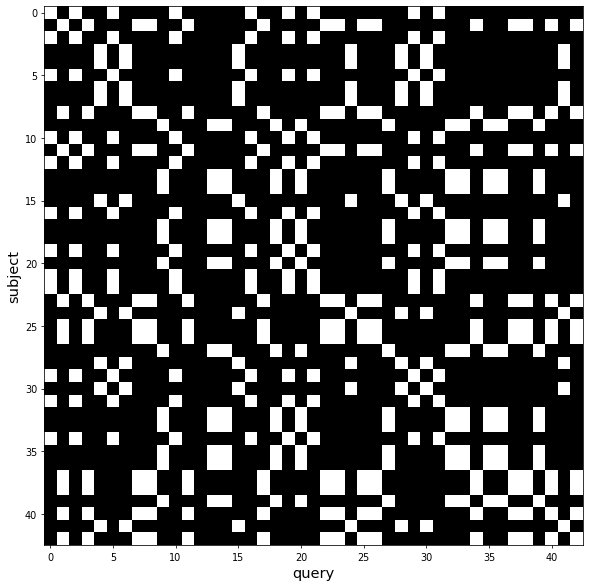

In [66]:
print("Subject vs Query DNA alignment dotplot")
print()
fill_plot(subject1, query1)

How to read a dotplot: each axis represents a sequence to be compared (DNA, in this case). White spots on the plot denote locations where nucleotides (or amino acids, for a protein alignment) align. Black spots show any mismatched/unaligned locations. A diagonal line of white spots (from top left to bottom right) should be apparent if the sequences are well-aligned.

### Transcribe and translate both DNA sequences to RNA and protein sequences:

In [46]:
print(f"subject DNA sequence: {subject1}")
print(f"query DNA sequence:   {query1}")
print()

if (len(subject1) % 3) == 1:
    subject1 = subject1 + "NN"
if (len(subject1) % 3) == 2:
    subject1 = subject1 + "N"
if (len(query1) % 3) == 1:
    query1 = query1 + "NN"
if (len(query1) % 3) == 2:
    query1 = query1 + "N"
for char in subject1:
    if char == "-":
        subject1 = subject1.replace("-", "N")
for char in query1:
    if char == "-":
        query1 = query1.replace("-", "N")

subj_seq = Seq(subject1)
query_seq = Seq(query1)

subj_transc=subj_seq.transcribe()
print(f"subject RNA sequence: {subj_transc}")
query_transc=query_seq.transcribe()
print(f"query RNA sequence:   {query_transc}")
print()

subj_transl=subj_transc.translate()
print(f"subject amino acid sequence: {subj_transl}")
query_transl=query_transc.translate()
print(f"query amino acid sequence:   {query_transl}")

subject DNA sequence: TATCCTCCAGTATGGCTGGTGTTACAAGCTCTGGTGGAAGACA
query DNA sequence:   TATACTCAAGTA-GGCTAGTGTAACAAGCTCTGGAGGAAGACA

subject RNA sequence: UAUCCUCCAGUAUGGCUGGUGUUACAAGCUCUGGUGGAAGACANN
query RNA sequence:   UAUACUCAAGUANGGCUAGUGUAACAAGCUCUGGAGGAAGACANN

subject amino acid sequence: YPPVWLVLQALVEDX
query amino acid sequence:   YTQVXLV*QALEEDX


### Protein alignment plots for the random sequence (query) and the #1 most similar sequence from BLAST (subject):

In [62]:
print("Subject vs Query protein alignment matrix")
print()
subj_prot = str(subj_transl)
query_prot = str(query_transl)
fill_print(subj_prot, query_prot)

Subject vs Query protein alignment matrix

Number of aligned bases: 10
Number of unaligned bases: 5

[[' ' 'Y' 'T' 'Q' 'V' 'X' 'L' 'V' '*' 'Q' 'A' 'L' 'E' 'E' 'D' 'X']
 ['Y' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['P' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['P' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['V' ' ' ' ' ' ' '*' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['W' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['L' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ']
 ['V' ' ' ' ' ' ' '*' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['L' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ']
 ['Q' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ']
 ['L' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ']
 ['V' ' ' ' ' ' ' '*' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['E' ' ' ' ' ' ' ' ' ' ' ' 

Alignment matrices (as shown above) convey similar information to dotplots, they just offer a different format. Asterisks denote locations of aligned amino acids. These matrices can be used for DNA/RNA sequences as well, but Jupyter doesn't like to display the matrices correctly when they get to be bigger (for longer sequences).

Subject vs Query protein alignment dotplot

Number of aligned bases: 10
Number of unaligned bases: 5



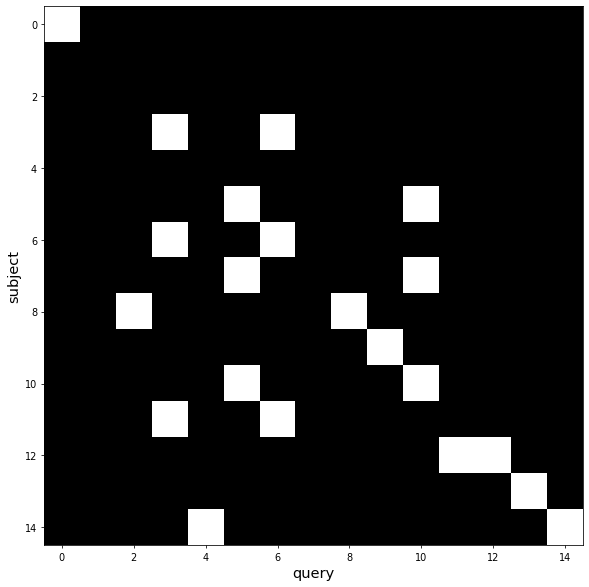

In [67]:
print("Subject vs Query protein alignment dotplot")
print()
fill_plot(subj_prot, query_prot)